In [38]:
#importing packages and libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# loading dataset

dataset = pd.read_csv(r'...\Diamonds Prices2022.csv')

In [3]:
#EDA

In [4]:
df = pd.DataFrame(dataset)

In [5]:
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


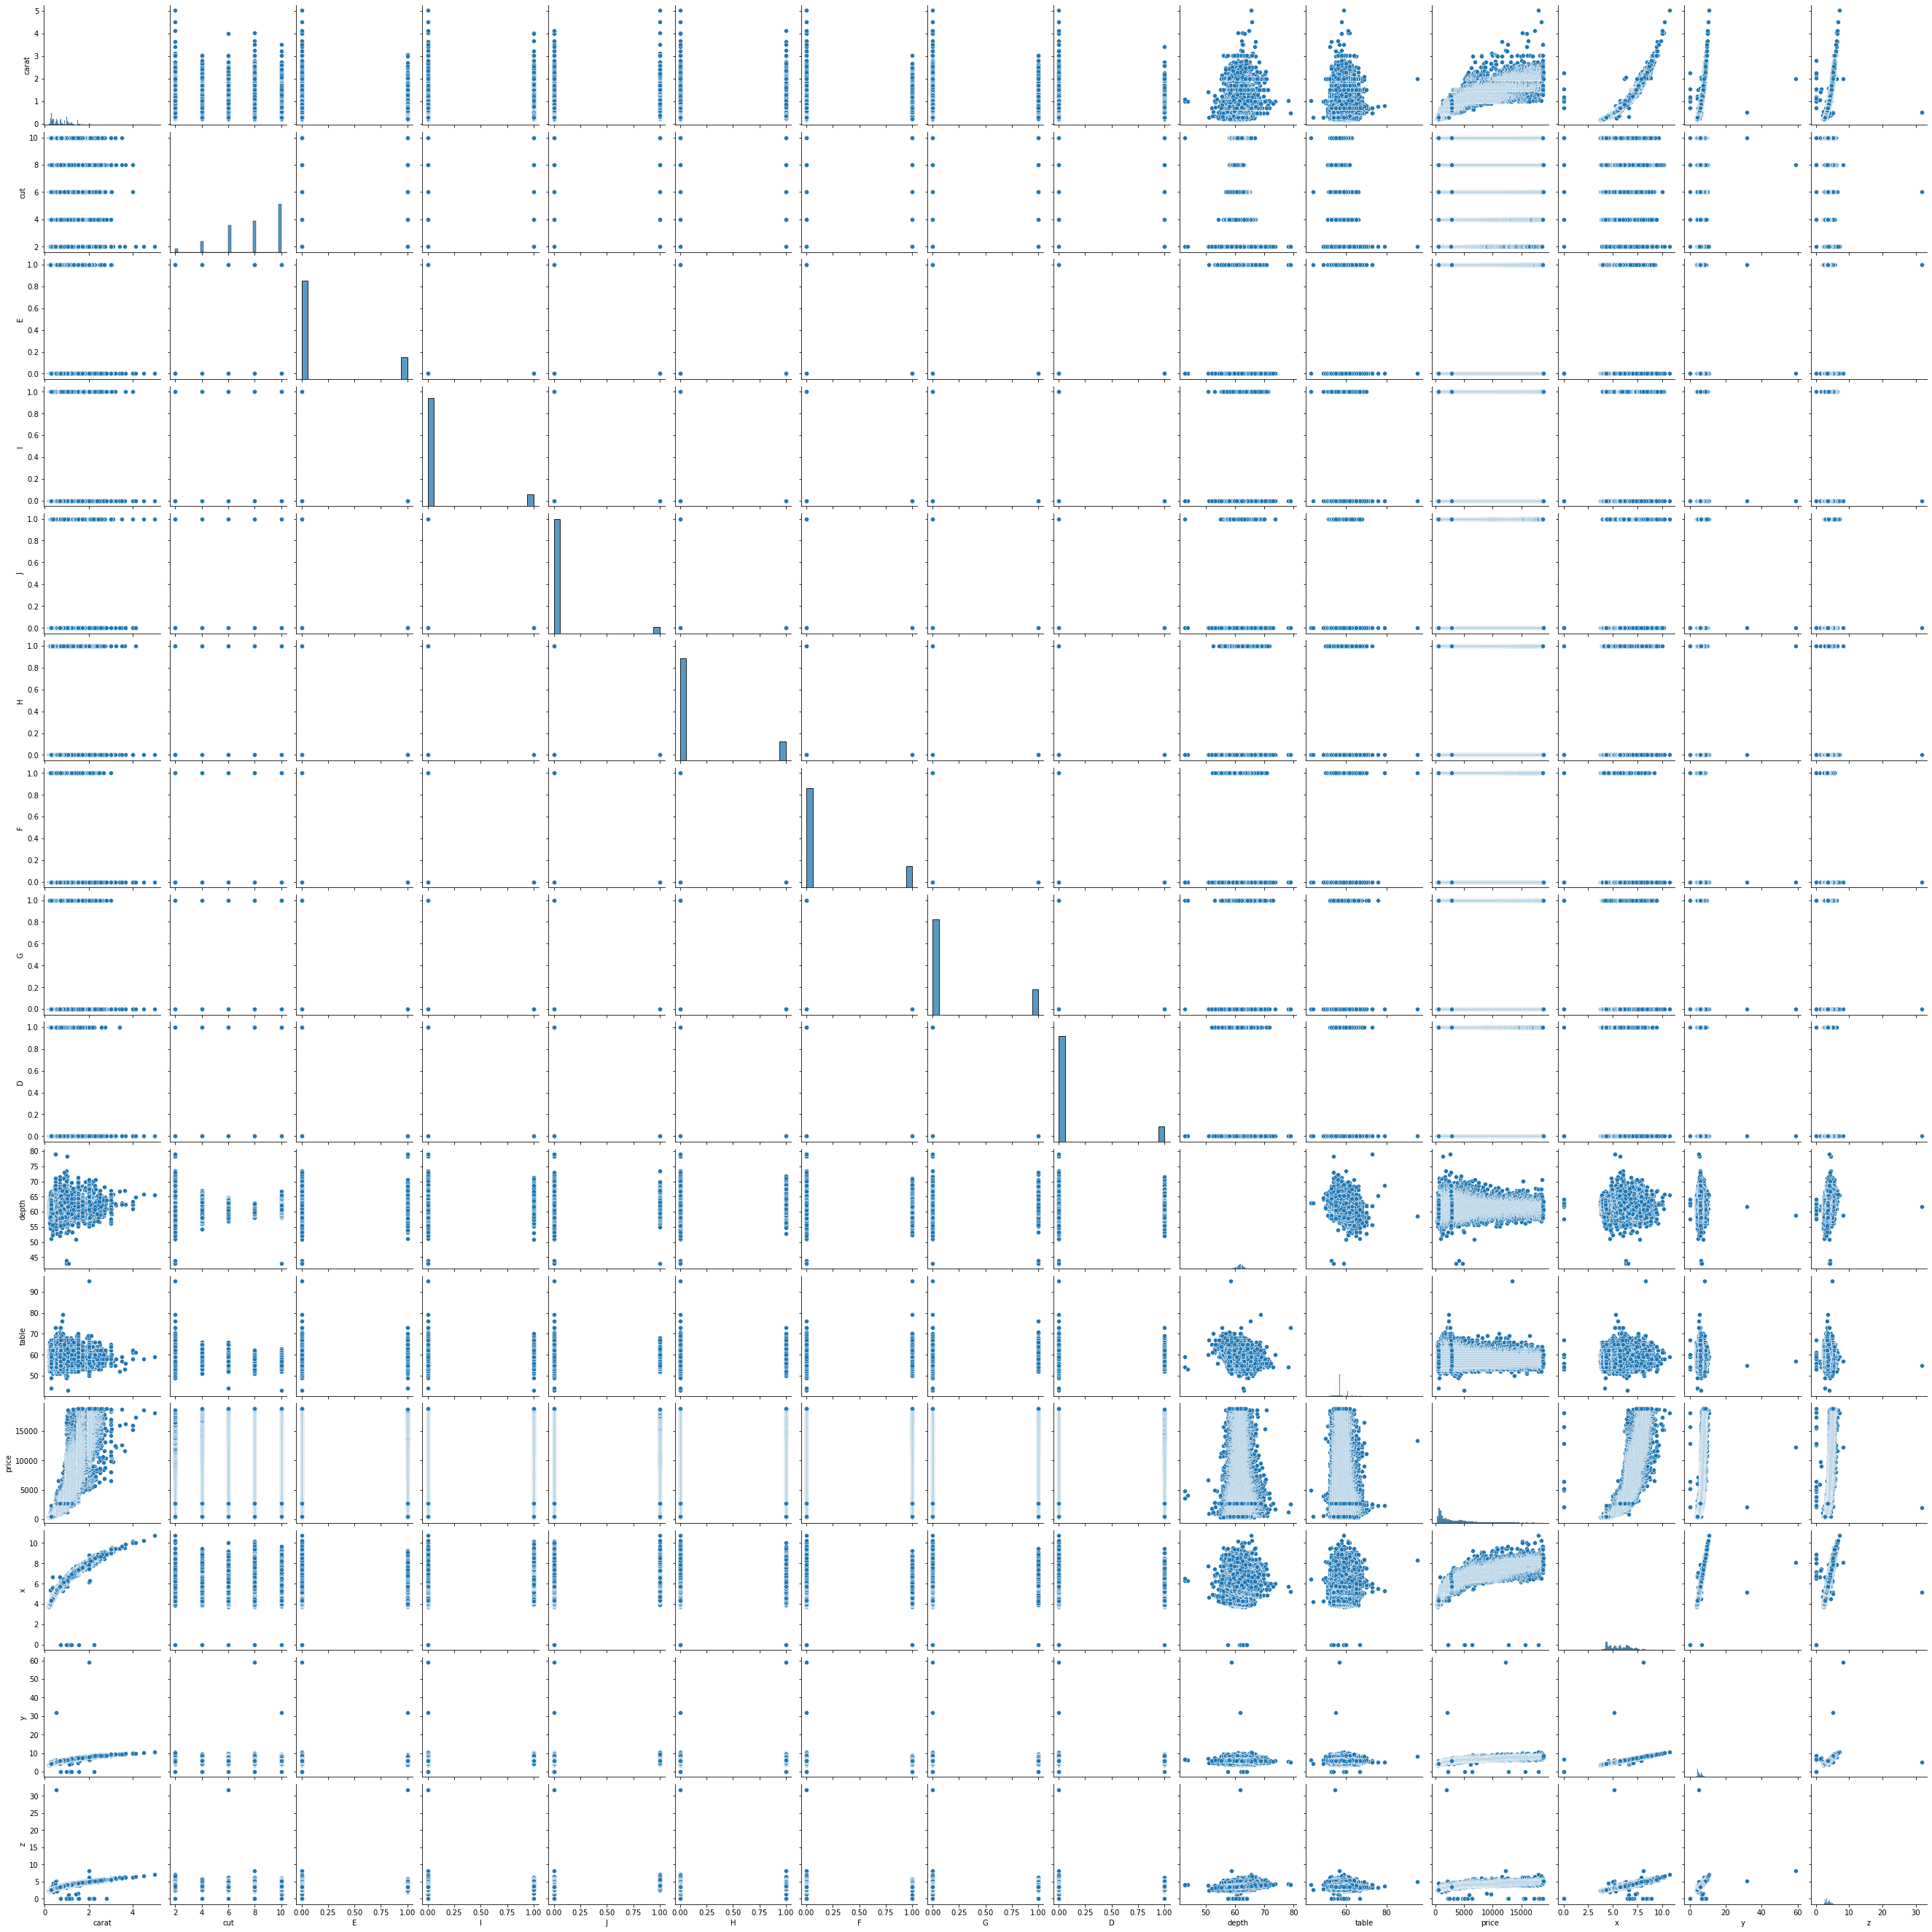

In [36]:
sea.pairplot(df)

In [7]:
#converting color column to one hot coding


In [8]:
color_list = list(df['color'])

In [9]:
# finding list of colors by removing duplicates using dict
color_list = list(dict.fromkeys(color_list))
color_list

['E', 'I', 'J', 'H', 'F', 'G', 'D']

In [10]:
# inserting columns to deploy one hot coding for color column


df.insert(4,'E',0)
df.insert(5,'I',0)
df.insert(6,'J',0)
df.insert(7,'H',0)
df.insert(8,'F',0)
df.insert(9,'G',0)
df.insert(10,'D',0)

In [11]:
df

,Unnamed: 0,carat,cut,color,E,I,J,H,F,G,D,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,0,0,0,0,0,0,0,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,0,0,0,0,0,0,0,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,0,0,0,0,0,0,0,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,0,0,0,0,0,0,0,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,0,0,0,0,0,0,0,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,0,0,0,0,0,0,0,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,0,0,0,0,0,0,0,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,0,0,0,0,0,0,0,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,0,0,0,0,0,0,0,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [12]:
for i in range(53943):
    if df['color'][i] == 'E':
        df['E'][i] = 1
        
    if df['color'][i] == 'I':
        df['I'][i] = 1
    
    
    if df['color'][i] == 'J':
        df['J'][i] = 1
        
    if df['color'][i] == 'H':
        df['H'][i] = 1
        
    if df['color'][i] == 'F':
        df['F'][i] = 1
    
    if df['color'][i] == 'G':
        df['G'][i] = 1
        
    if df['color'][i] == 'D':
        df['D'][i] = 1

<ipython-input-12-8cd033f96b72>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['E'][i] = 1
<ipython-input-12-8cd033f96b72>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['I'][i] = 1
<ipython-input-12-8cd033f96b72>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['J'][i] = 1
<ipython-input-12-8cd033f96b72>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the

In [13]:
df

,Unnamed: 0,carat,cut,color,E,I,J,H,F,G,D,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,1,0,0,0,0,0,0,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,1,0,0,0,0,0,0,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,1,0,0,0,0,0,0,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,0,1,0,0,0,0,0,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,0,0,1,0,0,0,0,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,0,0,0,1,0,0,0,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,0,0,0,0,0,0,1,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,1,0,0,0,0,0,0,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,0,0,0,0,1,0,0,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [14]:
#assigining scores for cut colomn

for j in range(53943):
    if df['cut'][j] == 'Ideal' :
        df['cut'][j] = 10
    if df['cut'][j] == 'Premium':
        df['cut'][j] = 8
    if df['cut'][j] == 'Very Good':
        df['cut'][j] = 6
    if df['cut'][j] == 'Good':
        df['cut'][j] = 4
    if df['cut'][j] == 'Fair':
        df['cut'][j] = 2

<ipython-input-14-ed513394d213>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'][j] = 10
<ipython-input-14-ed513394d213>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'][j] = 8
<ipython-input-14-ed513394d213>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cut'][j] = 4
<ipython-input-14-ed513394d213>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

In [15]:
y = df['price']

In [18]:
x = df.drop('Unnamed: 0', axis =1)
x= x.drop('color' , axis =1)

In [19]:
x

,carat,cut,E,I,J,H,F,G,D,clarity,depth,table,price,x,y,z
0,0.23,10,1,0,0,0,0,0,0,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,8,1,0,0,0,0,0,0,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,1,0,0,0,0,0,0,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,8,0,1,0,0,0,0,0,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,0,0,1,0,0,0,0,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,8,0,0,0,1,0,0,0,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,10,0,0,0,0,0,0,1,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,8,1,0,0,0,0,0,0,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,8,0,0,0,0,1,0,0,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [ ]:
plt.scatter(df['clarity'] , df['price'])

In [20]:
x = x.drop('clarity' , axis = 1)

In [21]:
x

,carat,cut,E,I,J,H,F,G,D,depth,table,price,x,y,z
0,0.23,10,1,0,0,0,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,8,1,0,0,0,0,0,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,1,0,0,0,0,0,0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,8,0,1,0,0,0,0,0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,0,0,1,0,0,0,0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,8,0,0,0,1,0,0,0,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,10,0,0,0,0,0,0,1,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,8,1,0,0,0,0,0,0,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,8,0,0,0,0,1,0,0,59.8,62.0,2756,5.74,5.73,3.43


,carat,cut,E,I,J,H,F,G,D,depth,table,price,x,y,z
0,0.23,10,1,0,0,0,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,8,1,0,0,0,0,0,0,59.8,61.0,326,3.89,3.84,2.31
2,0.23,4,1,0,0,0,0,0,0,56.9,65.0,327,4.05,4.07,2.31
3,0.29,8,0,1,0,0,0,0,0,62.4,58.0,334,4.20,4.23,2.63
4,0.31,4,0,0,1,0,0,0,0,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,8,0,0,0,1,0,0,0,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,10,0,0,0,0,0,0,1,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,8,1,0,0,0,0,0,0,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,8,0,0,0,0,1,0,0,59.8,62.0,2756,5.74,5.73,3.43


In [30]:
x_train , x_test , y_train , y_test = train_test_split(r, t , test_size = 0.25 , train_size =0.75 , shuffle = True )

In [32]:
my_model = LinearRegression().fit(x_train,y_train)

In [33]:
y_pred = my_model.predict(x_test)

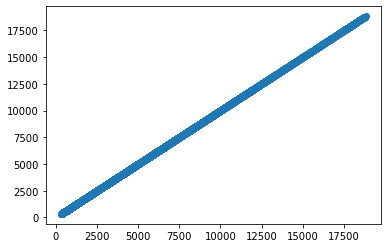

In [34]:
plt.scatter(y_pred,y_test)

In [39]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1.6161174924388159e-12
MSE: 4.1869245168027034e-24
RMSE: 2.046197575211813e-12
